In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [218]:
# Read the power consumption data
# the date_time column is being  derive from the first two columns to have a time-series reflection
url = './data/household_power_consumption.csv'
energy = pd.read_csv(url, parse_dates={'date_time':[0,1]}, keep_date_col=True)

In [219]:
#Display the top rows
energy.head()

,date_time,date,time,global_active_power,global_reactive_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3
0,2007-01-01 00:00:00,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,2007-01-01 00:01:00,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,2007-01-01 00:02:00,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,2007-01-01 00:03:00,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,2007-01-01 00:04:00,1/1/07,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0


In [220]:
# Check Data Type of columns
energy.dtypes

# Observations
# Many  float columns are stored as object (couldn't be converted to float while parsing as value error occurred)

date_time                datetime64[ns]
date                             object
time                             object
global_active_power              object
global_reactive_power            object
voltage                          object
global_intensity                 object
sub_metering_1                   object
sub_metering_2                   object
sub_metering_3                  float64
dtype: object

In [221]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260640 entries, 0 to 260639
Data columns (total 10 columns):
date_time                260640 non-null datetime64[ns]
date                     260640 non-null object
time                     260640 non-null object
global_active_power      260640 non-null object
global_reactive_power    260640 non-null object
voltage                  260640 non-null object
global_intensity         260640 non-null object
sub_metering_1           260640 non-null object
sub_metering_2           260640 non-null object
sub_metering_3           256869 non-null float64
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 19.9+ MB


In [222]:
energy.describe(include='all')
# Even if the data set was for meant first 6 months of year 2007, we see some observations outside of the time period

,date_time,date,time,global_active_power,global_reactive_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3
count,260640,260640,260640,260640,260640,260640,260640,260640,260640,256869.000000
unique,260640,181,1440,3585,414,2276,200,79,80,NaN
top,2007-03-31 17:13:00,26/3/2007,12:10:00,?,0,?,1.4,0,0,NaN
freq,1,1440,181,3771,65262,3771,23579,233670,173493,NaN
first,2007-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2007-12-06 23:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.831825
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.186709
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [150]:
# function to check count of rows that are not float and may have string values
def check_non_float_vals(df, col_list):
    count=0
    for i in df[col_list]:
        try:
            temp_var = float(i)
        except ValueError:
            count+=1
    print(count)

In [196]:
check_non_float_vals(energy, 'global_active_power')

3771


In [197]:
check_non_float_vals(energy, 'global_reactive_power')

3771


In [198]:
check_non_float_vals(energy, 'voltage')

3771


In [200]:
check_non_float_vals(energy, 'global_intensity')

3771


In [199]:
check_non_float_vals(energy, 'sub_metering_1')

3771


In [157]:
check_non_float_vals(energy, 'sub_metering_2')

3771


In [223]:
energy['global_active_power'].value_counts().head()
# 3771 Invalid value "?" present in the data set

?        3771
0.216    2975
0.218    2828
0.22     2471
0.214    2150
Name: global_active_power, dtype: int64

In [139]:
energy['global_reactive_power'].value_counts().head()
# 3771 Invalid value "?" present in the data set

0        65262
?         3771
0.1       2880
0.106     2832
0.104     2807
Name: global_reactive_power, dtype: int64

In [140]:
energy['voltage'].value_counts().head()
# 3771 Invalid value "?" present in the data set

?         3771
240.67     363
240.48     356
240.74     356
240.62     356
Name: voltage, dtype: int64

In [204]:
# Replace '?' values with null
energy.replace('?', np.NaN, inplace=True)

In [205]:
energy.describe(include='all')

,date_time,date,time,global_active_power,global_reactive_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3
count,260640,260640,260640,256869,256869,256869,256869,256869,256869,256869.000000
unique,260640,181,1440,3584,413,2275,199,78,79,NaN
top,2007-03-31 17:13:00,26/3/2007,12:10:00,0.216,0,240.67,1.4,0,0,NaN
freq,1,1440,181,2975,65262,363,23579,233670,173493,NaN
first,2007-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2007-12-06 23:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.831825
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.186709
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [206]:
# forward fill for null values based on the time series data
energy.fillna(method='ffill', inplace=True)

In [207]:
energy.describe(include='all')

,date_time,date,time,global_active_power,global_reactive_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3
count,260640,260640,260640,260640,260640,260640,260640,260640,260640,260640.000000
unique,260640,181,1440,3584,413,2275,199,78,79,NaN
top,2007-03-31 17:13:00,26/3/2007,12:10:00,0.492,0,236.24,1.4,0,0,NaN
freq,1,1440,181,3899,65263,3853,23579,237440,177260,NaN
first,2007-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2007-12-06 23:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.747901
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.157199
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [ ]:
# Change the data type of objects to float

In [208]:
energy['global_active_power'] = energy['global_active_power'].astype('float64')

In [209]:
energy['global_reactive_power'] = energy['global_reactive_power'].astype('float64')

In [210]:
energy['voltage'] = energy['voltage'].astype('float64')

In [211]:
energy['global_intensity'] = energy['global_intensity'].astype('float64')

In [212]:
energy['sub_metering_1'] = energy['sub_metering_1'].astype('float64')

In [213]:
energy['sub_metering_2'] = energy['sub_metering_2'].astype('float64')

In [214]:
energy.dtypes

date_time                datetime64[ns]
date                             object
time                             object
global_active_power             float64
global_reactive_power           float64
voltage                         float64
global_intensity                float64
sub_metering_1                  float64
sub_metering_2                  float64
sub_metering_3                  float64
dtype: object

In [177]:
energy.describe(include='all')

,datetime,date,time,global_active_power,global_reactive_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3
count,260640,260640,260640,260640.000000,260640.000000,260640.000000,260640.000000,260640.000000,260640.000000,260640.000000
unique,260640,181,1440,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2007-03-31 17:13:00,26/3/2007,12:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1440,181,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2007-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2007-12-06 23:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.155304,0.124930,239.166798,4.935018,1.313206,1.646459,5.747901
std,NaN,NaN,NaN,1.175996,0.111513,3.584235,4.974231,6.658190,6.586233,8.157199
min,NaN,NaN,NaN,0.082000,0.000000,223.490000,0.400000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,0.298000,0.000000,236.500000,1.400000,0.000000,0.000000,0.000000


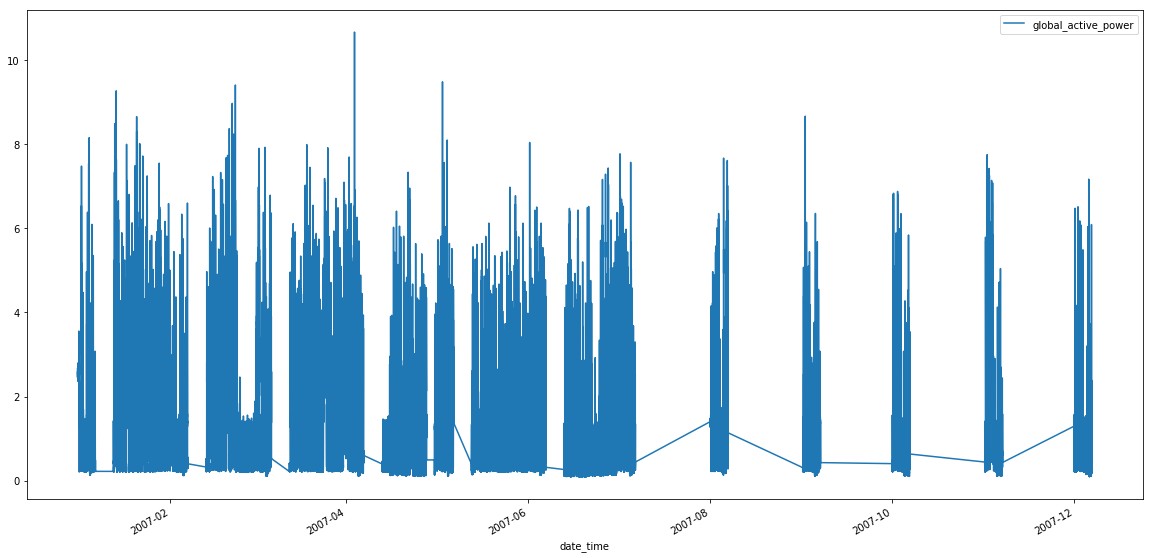

In [215]:
energy.plot.line(x='date_time', y='global_active_power', figsize=(20, 10))